# NICAR 2017 agate hands-on    

## How do I import agate?

In [3]:
import agate

/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-27 09:35:52.680895. Please add timezone info to timestamps.


## How do I load my alligator data from a CSV?

In [4]:
alligators = agate.Table.from_csv('alligators.csv')

/Users/cgroskopf/src/nicar-2017-agate/.venv/lib/python3.6/site-packages/babel/localtime/_unix.py:8: DeprecationWarning: Flags not at the start of the expression ^Time Zone: (.*)$(?m (truncated)
/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-27 09:35:53.949458. Please add timezone info to timestamps.


## How do I figure out what the data are?

In [5]:
print(alligators)

| column       | data_type |
| ------------ | --------- |
| Year         | Number    |
| Area Number  | Number    |
| Area Name    | Text      |
| Carcass Size | Text      |
| Size         | Number    |
| Harvest Date | Date      |



/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-27 09:36:28.104884. Please add timezone info to timestamps.


In [6]:
len(alligators)

87181

/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-27 09:36:28.112360. Please add timezone info to timestamps.


In [7]:
alligators.print_table()

|  Year | Area Number | Area Name   | Carcass Size  |    Size | Harvest Date |
| ----- | ----------- | ----------- | ------------- | ------- | ------------ |
| 2,000 |         101 | LAKE PIERCE | 11 ft. 5 in.  | 11.417… |   2000-09-22 |
| 2,000 |         101 | LAKE PIERCE | 9 ft. 0 in.   |  9.000… |   2000-10-02 |
| 2,000 |         101 | LAKE PIERCE | 8 ft. 10 in.  |  8.833… |   2000-10-06 |
| 2,000 |         101 | LAKE PIERCE | 8 ft. 0 in.   |  8.000… |   2000-09-25 |
| 2,000 |         101 | LAKE PIERCE | 8 ft. 0 in.   |  8.000… |   2000-10-07 |
| 2,000 |         101 | LAKE PIERCE | 8 ft. 0 in.   |  8.000… |   2000-09-22 |
| 2,000 |         101 | LAKE PIERCE | 7 ft. 2 in.   |  7.167… |   2000-09-21 |
| 2,000 |         101 | LAKE PIERCE | 7 ft. 1 in.   |  7.083… |   2000-09-21 |
| 2,000 |         101 | LAKE PIERCE | 6 ft. 11 in.  |  6.917… |   2000-09-25 |
| 2,000 |         101 | LAKE PIERCE | 6 ft. 7 in.   |  6.583… |   2000-09-25 |
| 2,000 |         101 | LAKE PIERCE | 6 ft. 6 in.   

/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-27 09:36:28.142579. Please add timezone info to timestamps.


## How many alligators were harvest in 2015?

In [8]:
alligators.aggregate(agate.Count('Year', 2015))

6726

/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-27 09:36:29.037809. Please add timezone info to timestamps.


## What is the median size of all harvested alligators?

In [7]:
alligators.aggregate(agate.Median('Size'))

Decimal('8.166666667')

/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-27 08:07:08.373933. Please add timezone info to timestamps.


## Are Lake Pierce's gators bigger or smaller than gators elsewhere?

In [16]:
lake_pierce_gators = alligators.where(lambda row: row['Area Name'] == 'LAKE PIERCE')

len(lake_pierce_gators)

284

/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-27 09:42:31.630379. Please add timezone info to timestamps.


In [11]:
lake_pierce_gators.aggregate(agate.Median('Size'))

Decimal('7.833333333')

/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-27 09:36:52.267958. Please add timezone info to timestamps.


## How big would these gators be in Europe?

In [13]:
import decimal

metric_gators = alligators.compute([
    ('size_meters', agate.Formula(agate.Number(), lambda row: row['Size'] * decimal.Decimal(0.3048)))
])

metric_gators.aggregate(agate.Max('size_meters'))

Decimal('4.343400000000000218958184917')

/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-27 09:37:45.871397. Please add timezone info to timestamps.


## Where were the largest alligators harvested?

In [14]:
sorted_by_size = alligators.order_by('Size', reverse=True).limit(10)

biggest_gators = sorted_by_size.limit(10)

biggest_gators.print_table()

|  Year | Area Number | Area Name            | Carcass Size  |    Size | Harvest Date |
| ----- | ----------- | -------------------- | ------------- | ------- | ------------ |
| 2,010 |         502 | ST. JOHNS RIVER (... | 14 ft. 3 in.  | 14.250… |   2010-10-31 |
| 2,014 |         828 | HIGHLANDS COUNTY     | 14 ft. 3 in.  | 14.250… |   2014-10-28 |
| 2,008 |         510 | LAKE JESUP           | 14 ft. 1 in.  | 14.083… |   2008-08-26 |
| 2,013 |         733 | LAKE TALQUIN         | 14 ft. 1 in.  | 14.083… |   2013-09-02 |
| 2,012 |         828 | HIGHLANDS COUNTY     | 14 ft. 0 in.  | 14.000… |   2012-10-31 |
| 2,008 |         508 | CRESCENT LAKE        | 13 ft. 11 in. | 13.917… |   2008-09-21 |
| 2,007 |         823 | GULF COUNTY          | 13 ft. 10 in. | 13.833… |   2007-08-16 |
| 2,007 |         103 | KISSIMMEE RIVER (... | 13 ft. 9 in.  | 13.750… |   2007-08-30 |
| 2,008 |         864 | VOLUSIA COUNTY       | 13 ft. 9 in.  | 13.750… |   2008-11-30 |
| 2,013 |         852 | PINELLAS

/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-27 09:37:48.004119. Please add timezone info to timestamps.


## What is the distribution of alligator sizes?

In [19]:
binned_sizes = alligators.bins('Size')
binned_sizes.print_bars('Size', 'Count', width=100)

Size       Count
[0 - 2)       91 ▓                                                                                  
[2 - 4)      307 ▓░                                                                                 
[4 - 6)    5,824 ▓░░░░░░░░░░░░                                                                      
[6 - 8)   32,041 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                
[8 - 10)  30,523 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                   
[10 - 12) 16,341 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                                                 
[12 - 14)  2,049 ▓░░░░                                                                              
[14 - 16)      5 ▓                                                                                  
                 +-------------------+--------------------+--------------------+-------------------+
                 0                10,000               20,000             

/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-27 09:43:31.535128. Please add timezone info to timestamps.


## Which area harvests the most alligators?

In [14]:
by_area = alligators.group_by('Area Name')

area_totals = by_area.aggregate([
    ('count', agate.Count())
])

sorted_totals = area_totals.order_by('count', reverse=True)

sorted_totals.print_table(max_rows=5, max_column_width=40)

| Area Name                       | count |
| ------------------------------- | ----- |
| ST. JOHNS RIVER (LAKE POINSETT) | 5,188 |
| LAKE OKEECHOBEE (SOUTH)         | 4,122 |
| ORANGE LAKE                     | 3,110 |
| LAKE OKEECHOBEE (WEST)          | 3,073 |
| KISSIMMEE RIVER                 | 2,978 |
| ...                             |   ... |


/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-27 08:07:12.102265. Please add timezone info to timestamps.


## Which area harvests the largest alligators?

In [15]:
area_medians = by_area.aggregate([
    ('count', agate.Count()),
    ('median_size', agate.Median('Size'))
])

sorted_medians = area_medians.order_by('median_size', reverse=True)

sorted_medians.print_table(max_rows=5, max_column_width=40)

| Area Name         | count | median_size |
| ----------------- | ----- | ----------- |
| ST. JOHNS         |     1 |     11.583… |
| LAKE              |     2 |     10.500… |
| STICK MARSH       |   503 |     10.417… |
| LAKE PARKER       |    25 |     10.250… |
| PALM BEACH COUNTY |    82 |      9.750… |
| ...               |   ... |         ... |


/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-27 08:07:12.927551. Please add timezone info to timestamps.


## Where and when was the largest concentration of big alligators harvested?

In [16]:
by_area_and_year = by_area.group_by('Year')

bigguns = by_area_and_year.where(lambda row: row['Size'] >= 12)

biggun_groups = bigguns.aggregate([
    ('count', agate.Count())
])

sorted_groups = biggun_groups.order_by('count', reverse=True)

sorted_groups.print_table()

| Area Name            |  Year | count |
| -------------------- | ----- | ----- |
| LAKE OKEECHOBEE (... | 2,000 |    43 |
| LAKE OKEECHOBEE (... | 2,006 |    34 |
| LAKE JESUP           | 2,009 |    32 |
| LAKE OKEECHOBEE (... | 2,001 |    26 |
| LAKE GEORGE          | 2,005 |    22 |
| LAKE OKEECHOBEE (... | 2,006 |    20 |
| LAKE GEORGE          | 2,013 |    20 |
| LAKE OKEECHOBEE (... | 2,000 |    18 |
| LAKE GEORGE          | 2,006 |    18 |
| LAKE GEORGE          | 2,007 |    18 |
| LAKE JESUP           | 2,008 |    17 |
| LAKE GEORGE          | 2,011 |    17 |
| LAKE OKEECHOBEE (... | 2,004 |    16 |
| LAKE GEORGE          | 2,010 |    16 |
| PUTNAM COUNTY        | 2,011 |    16 |
| LAKE OKEECHOBEE (... | 2,007 |    15 |
| LAKE JESUP           | 2,010 |    14 |
| LAKE OKEECHOBEE (... | 2,000 |    14 |
| LAKE OKEECHOBEE (... | 2,001 |    14 |
| LAKE COUNTY          | 2,011 |    14 |
| ...                  |   ... |   ... |


/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-27 08:07:13.382628. Please add timezone info to timestamps.


Leather will try to maintain a reasonable aspect ratio for chart. In this case the chart is too short to display correctly. We've used the `height` argument to make the chart a little taller.

## What's the gator trend?

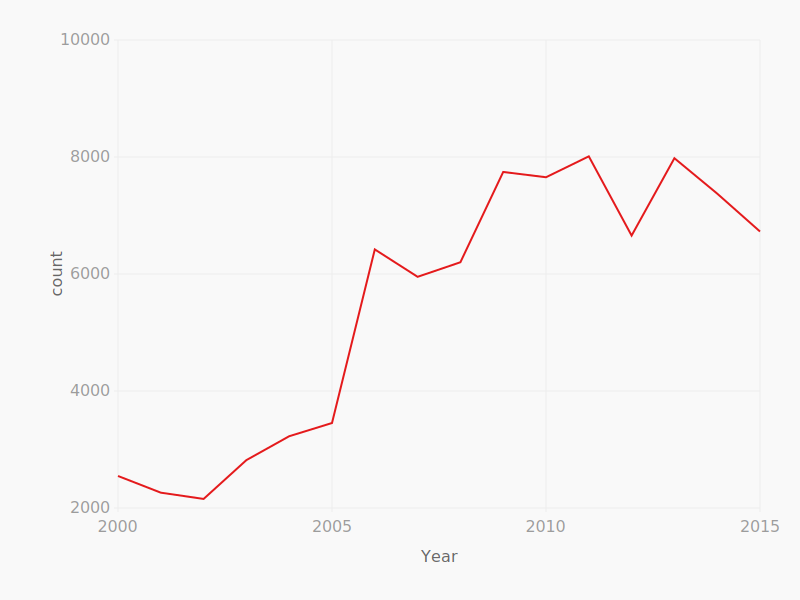

/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-27 08:07:14.788269. Please add timezone info to timestamps.


In [19]:
by_year_alligators = alligators.group_by('Year')

counts = by_year_alligators.aggregate([
    ('count', agate.Count())
])

counts.order_by('Year').line_chart('Year', 'count')

## What's the gator trend in the top gator harvesting areas?

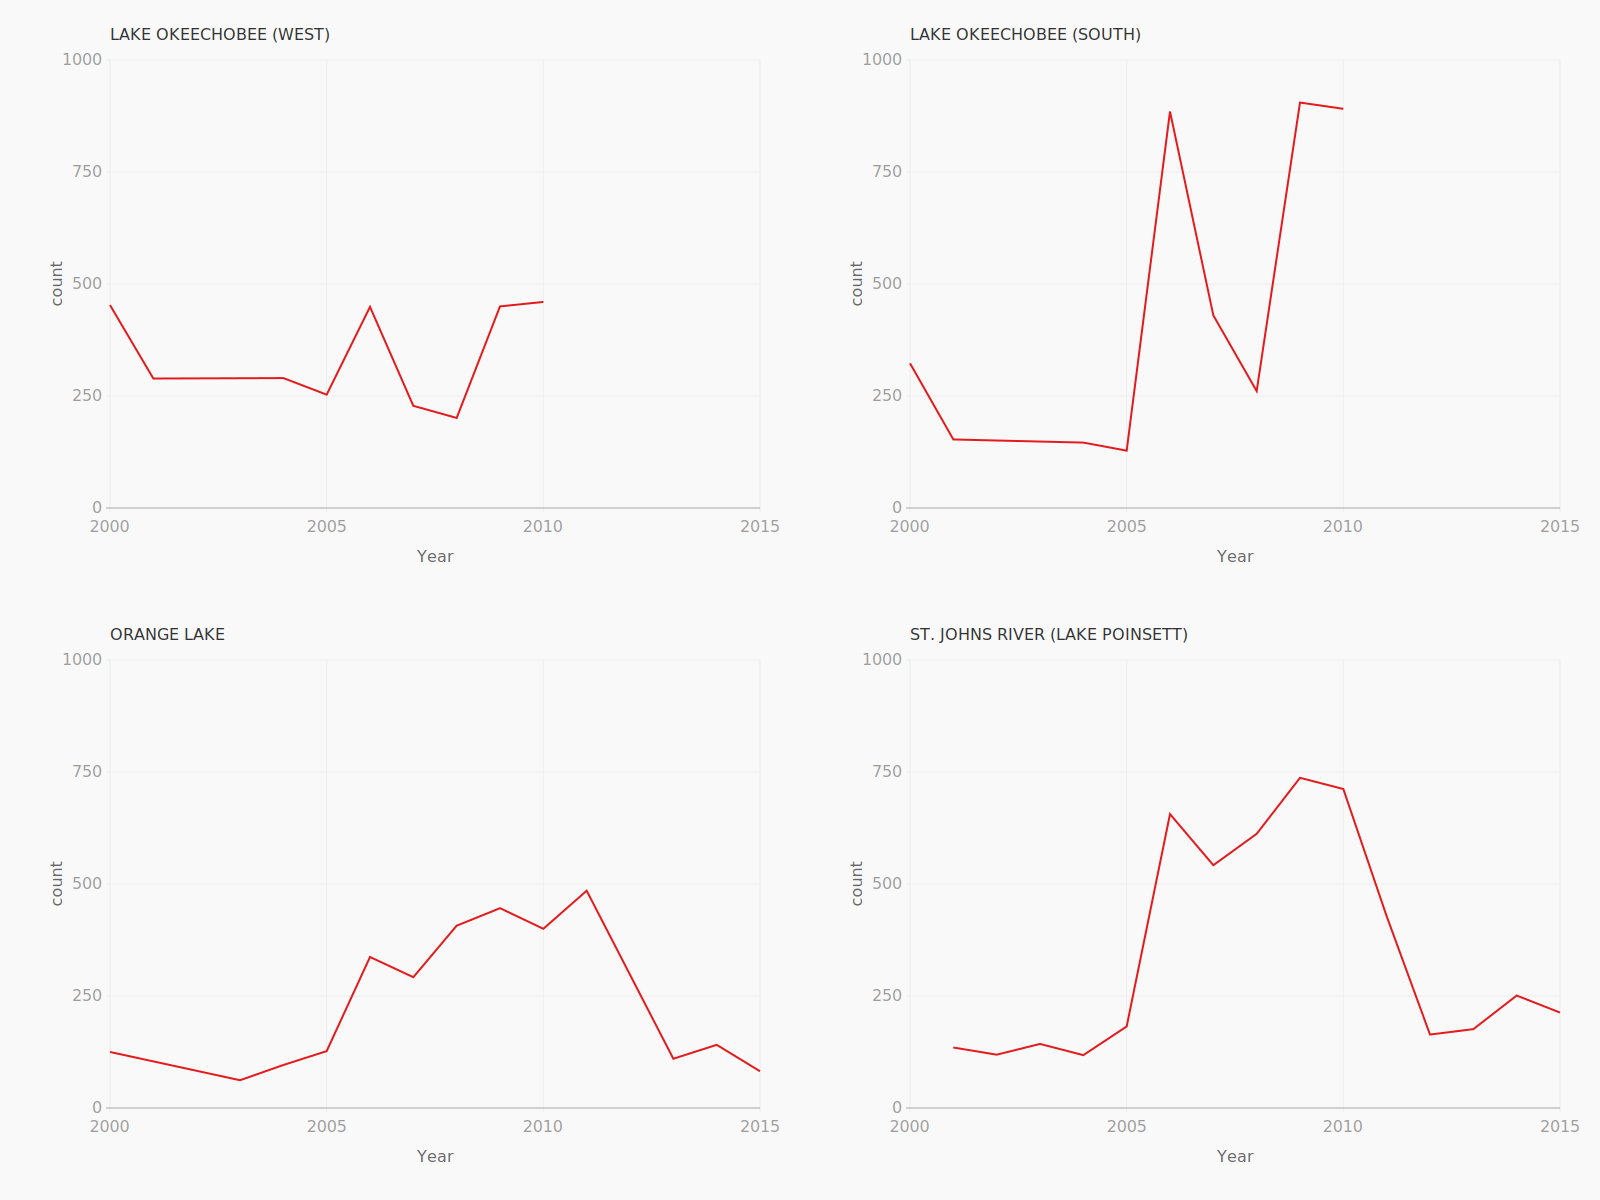

/Users/cgroskopf/.pyenv/versions/3.6.0/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-02-27 08:07:15.370343. Please add timezone info to timestamps.


In [20]:
top_areas = alligators.group_by('Area Name').having([
    ('count', agate.Count())
], lambda t: t['count'] > 3000)

by_year = top_areas.group_by('Year')

counts = by_year.aggregate([
    ('count', agate.Count())
])

by_area = counts.group_by('Area Name')

by_area.order_by('Area Name').line_chart('Year', 'count')

### Styling charts

Where to go next
================

* Check out the [`cookbook`](http://agate.readthedocs.io/en/latest/cookbook.html) 
* Learn about [`extensions`](http://agate.readthedocs.io/en/latest/extensions.html)
* Think about [`contributing`](http://agate.readthedocs.io/en/latest/contributing.html)
* Report any [`issues`](https://github.com/wireservice/agate/issues)

Good luck in your reporting!